# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
import tensorflow.keras # Packages# Load Data
from tensorflow.keras.layers import Reshape, Flatten, Input, concatenate, Embedding, Conv1D
from tensorflow.keras.layers import RNN, LSTM, GRU, Dense, Embedding, Input, BatchNormalization, LeakyReLU, Dropout, ReLU
from tensorflow.keras.models import Sequential, Model, load_model, model_from_json
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.utils import CustomObjectScope

print(tf.__version__)

2.2.0


In [2]:
np.random.seed(1998)
random.seed(1998)
tf.random.set_seed(1998)

# Load Data

In [3]:
data = pd.read_csv('data/기상병합_data3.csv')
testdata = pd.read_csv('data/test_기상병합.csv')

print(data.shape)
print(testdata.shape)

(342732, 18)
(3539, 17)


## Preprocessing

In [4]:
train = data.drop(['plant_train.mea_ddhr', 'plant_train.plant', 'plant_train.loc', 
                      'plant_train.cond_loc', 'plant_test.x24h_tma', 'plant_train.x24h_cond_loc',
                      'plant_test.x48h_tma', 'plant_train.x48h_cond_loc'], axis = 1)
test = testdata.drop(['plant_test.mea_ddhr', 'plant_test.plant', 'plant_test.loc',
                      'plant_test.x24h_tma', 'plant_test.x24h_cond_loc',
                      'plant_test.x48h_tma', 'plant_test.x48h_cond_loc'], axis = 1)

train_con1 = np.array(data.loc[:,'plant_train.plant'])-1
train_con2 = np.array(data.loc[:,'plant_train.loc'])-1

test_con1 = np.array(testdata.loc[:,'plant_test.plant'])-1
test_con2 = np.array(testdata.loc[:,'plant_test.loc'])-1

train_label_24 = np.array(data.loc[:,'plant_train.x24h_cond_loc'])
train_label_48 = np.array(data.loc[:,'plant_train.x48h_cond_loc'])

In [5]:
train_con1 = tf.keras.utils.to_categorical(train_con1, num_classes=2)
train_con2 = tf.keras.utils.to_categorical(train_con2, num_classes=3)

test_con1 = tf.keras.utils.to_categorical(test_con1, num_classes=2)
test_con2 = tf.keras.utils.to_categorical(test_con2, num_classes=3)

print(train_con1.shape)
print(train_con2.shape)
print(test_con1.shape)
print(test_con2.shape)

(342732, 2)
(342732, 3)
(3539, 2)
(3539, 3)


In [6]:
train = np.reshape(np.array(train), [train.shape[0], 1, train.shape[1]])
test = np.reshape(np.array(test), [test.shape[0], 1, test.shape[1]])

train_con1 = np.reshape(train_con1, [train_con1.shape[0], 1, train_con1.shape[1]])
train_con2 = np.reshape(train_con2, [train_con2.shape[0], 1, train_con2.shape[1]])

test_con1 = np.reshape(test_con1, [test_con1.shape[0], 1, test_con1.shape[1]])
test_con2 = np.reshape(test_con2, [test_con2.shape[0], 1, test_con2.shape[1]])

print(train.shape)
print(test.shape)
print(train_con1.shape)
print(train_con2.shape)
print(test_con1.shape)
print(test_con2.shape)

(342732, 1, 10)
(3539, 1, 10)
(342732, 1, 2)
(342732, 1, 3)
(3539, 1, 2)
(3539, 1, 3)


# Modeling

## Load Model

In [7]:
json_file = open("Model/model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
model = model_from_json(loaded_model_json)

## Model Summary

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X_data (InputLayer)             [(None, None, 10)]   0                                            
__________________________________________________________________________________________________
con1 (InputLayer)               [(None, None, 2)]    0                                            
__________________________________________________________________________________________________
con2 (InputLayer)               [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, None, 15)     0           X_data[0][0]                     
                                                                 con1[0][0]                   

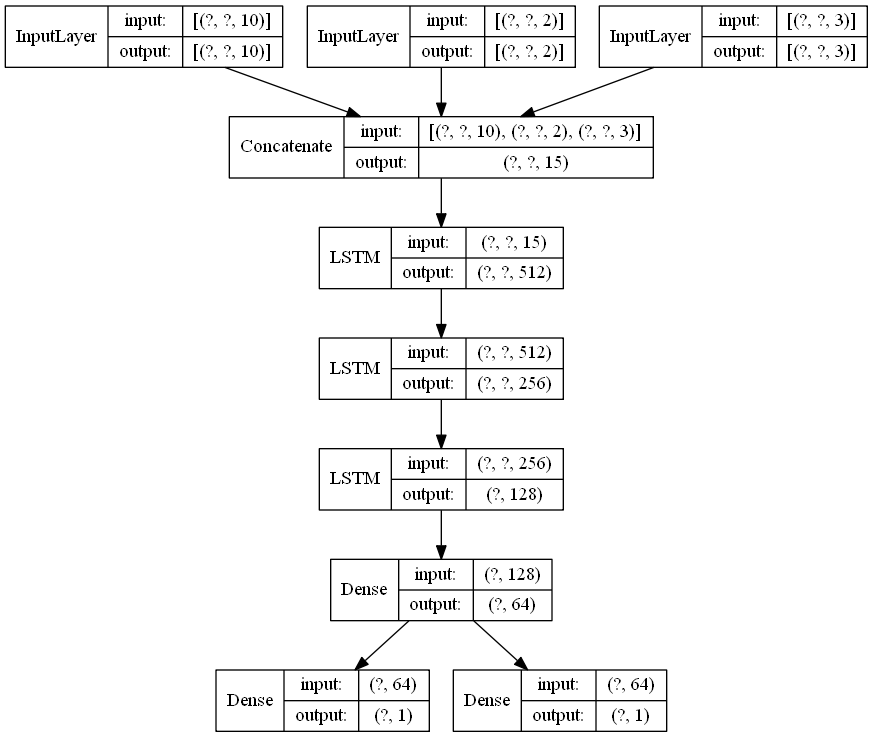

In [8]:
model.summary()
tf.keras.utils.plot_model(model,show_shapes=True, show_layer_names=False)

## Fitting

In [9]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit([train, train_con1, train_con2], [train_label_24, train_label_48],
                    epochs = 30, 
                    batch_size = 128)

Epoch 1/30
2678/2678 [==============================] - 16s 6ms/step - loss: 0.0621 - 24hour_loss: 0.0284 - 48hour_loss: 0.0337 - 24hour_accuracy: 0.9943 - 48hour_accuracy: 0.9943
Epoch 2/30
2678/2678 [==============================] - 16s 6ms/step - loss: 0.0538 - 24hour_loss: 0.0233 - 48hour_loss: 0.0305 - 24hour_accuracy: 0.9944 - 48hour_accuracy: 0.9943
Epoch 3/30
2678/2678 [==============================] - 16s 6ms/step - loss: 0.0519 - 24hour_loss: 0.0222 - 48hour_loss: 0.0297 - 24hour_accuracy: 0.9946 - 48hour_accuracy: 0.9943
Epoch 4/30
2678/2678 [==============================] - 17s 6ms/step - loss: 0.0503 - 24hour_loss: 0.0216 - 48hour_loss: 0.0288 - 24hour_accuracy: 0.9947 - 48hour_accuracy: 0.9943
Epoch 5/30
2678/2678 [==============================] - 16s 6ms/step - loss: 0.0489 - 24hour_loss: 0.0207 - 48hour_loss: 0.0281 - 24hour_accuracy: 0.9949 - 48hour_accuracy: 0.9943
Epoch 6/30
2678/2678 [==============================] - 16s 6ms/step - loss: 0.0481 - 24hour_loss: 0

### Ending Music

In [11]:
import winsound 
def main(): # 도,레,미,파,솔,라,시 Hz
    so1 = {'do':261,'re':293,'mi':329,'pa':349,'sol':391,'ra':440,'si':493} 
    mel = ['do','mi','mi', 'mi','sol','sol', 're','pa','pa','ra','si','si'] 
    dur = [4,4,2, 4,4,2, 4,4,2, 4,4,2]
    mel2 = ['sol','do','ra','pa','mi','do','re']
    dur2 = [1,1,1,1,1,1,1]
    music = zip(mel,dur)
    music2 = zip(mel2,dur2) 
    for melody,duration in music: winsound.Beep(so1[melody],1000//duration)
    for melody,duration in music2: winsound.Beep(so1[melody],1000//duration) 
        
        
if __name__ == '__main__': main()

# Make Submission

In [12]:
pred = model.predict([test, test_con1, test_con2])

pred_cl1 = pred[0] >= 0.5
pred_cl1 = pred_cl1.astype(int)

pred_cl2 = pred[1] >= 0.5
pred_cl2 = pred_cl1.astype(int)

a=pd.DataFrame()

a['MEA_DDHR'] = testdata['plant_test.mea_ddhr']
a['PLANT'] = testdata['plant_test.plant']
a['LOC'] = testdata['plant_test.loc']

a['X24H_TMA'] = testdata['plant_test.x24h_tma']
a['X24H_COND_LOC'] = pred_cl1
a['X24H_COND_LOC_PROB'] = pred[0]

a['X48H_TMA'] = testdata['plant_test.x24h_tma']
a['X48H_COND_LOC'] = pred_cl2
a['X48H_COND_LOC_PROB'] = pred[1]

a.to_csv('203608.csv', index = False)

# End